In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Case-Studies/Interest Rate/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Case-Studies/Interest Rate


# ATTRIBUTE INFORMATION: 

1. ID : Identifiers of each customer 
2. Amount_Requested : Loan Requirement of customer
3. Amount_Funded_By_Investors : The lon amount given by bank/investor
4. Interest_Rate : Dependent variable, the interest charged by bank.
5. Loan Length : The time duration of loan
6. Debt_To_Income_Ratio : Ratio of debt to income of customer
7. State : State of customer 
8. Home_Ownership : Ownership of the house
9. Monthly_Income : Monthly Income of customer 
10. FICO_Range : Banking term
11. Open_CREDIT_Lines = Banking term 
12. Revolving_CREDIT_Balance : Banking term
13. Inquiries_In_Last_6_Months : Number of inquiries by customer
14. Employement_Length : Length of the employement


In [2]:
# Lets import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# We will import more libraries further as need them

# Reading the data

In [3]:
# Lets create a dataframe named 'data' which contains our LoanData
data = pd.read_csv('LoanData.csv')

In [4]:
# Creating a shallow copy of our original data to further work on
df = data.copy()

# Understanding the data

In [5]:
# Lets look at the number of rows and number of columns in our data
df.shape

(2500, 15)

In [6]:
# Looking at the first 5 rows of our data
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [7]:
# Looking at the last 5 rows of our data
df.tail()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2495,23735.0,30000,29950,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15,45880,1.0,8 years
2496,65882.0,16000,16000,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18,18898,1.0,10+ years
2497,55610.0,10000,10000,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4,4544,0.0,10+ years
2498,38576.0,6000,6000,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8,.,0.0,5 years
2499,3116.0,9000,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7,7589,0.0,10+ years


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

In [9]:
# Looking at the column names in our data
df.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [10]:
# As seen our columns contain '.' which is also fine but
# For better understanding we will replace the '.' in column names with '_'.
df.columns = ['ID', 'Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
      'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length']
     

In [11]:
# Checking for null values in our dataset
df.isnull().sum()

ID                                 1
Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  4
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 78
dtype: int64

## Observations: 
1. Our data contains 2500 rows and 15 columns.
2. There are some missing values in our data which we will fill further
3. There are incorrect column datatypes in our data which needs to be fixed
4. There are incorrect values ('.') in some columns which we will remove and fix that.

# Cleaning the Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2499 non-null   object 
 2   Amount_Funded_By_Investors      2499 non-null   object 
 3   Interest_Rate                   2500 non-null   object 
 4   Loan_Length                     2499 non-null   object 
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2496 non-null   object 
 12  Revolving_CREDIT_Balance        24

In [13]:
df.head(10)

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years
5,62403.0,6000,6000,15.31%,36 months,other,20.05%,CT,OWN,4891.67,670-674,17,10391,2.0,3 years
6,48808.0,10000,10000,7.90%,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,720-724,10,15957,0.0,10+ years
7,22090.0,33500,33450,17.14%,60 months,credit_card,14.70%,LA,MORTGAGE,13863.42,705-709,12,27874,0.0,10+ years
8,76404.0,14675,14675,14.33%,36 months,credit_card,26.92%,CA,RENT,3150.00,685-689,9,7246,1.0,8 years
9,15867.0,.,7000,6.91%,36 months,credit_card,7.10%,CA,RENT,5000.00,715-719,8,7612,0.0,3 years


In [14]:
# Changing the data type of 'Amount_Requested' column.
# As there are '.' in some rows of 'Amount_Requested' so we will replace it with 'nan'.
# After replacing we will change the datatype of thr column.
df['Amount_Requested'].replace('.',np.nan,inplace=True)
df['Amount_Requested'] = df['Amount_Requested'].astype(float)

In [15]:
# Similarly replacing '.' with 'np.nan' and changing the data type
df['Amount_Funded_By_Investors'].replace('.',np.nan,inplace=True)
df['Amount_Funded_By_Investors'] = df['Amount_Funded_By_Investors'].astype(float)

In [16]:
# Now for interest rate there is '%' which we will remove and then convert it to float
df['Interest_Rate'] = df['Interest_Rate'].str.strip('%')

df['Interest_Rate'] = df['Interest_Rate'].astype(float)

# As our interest rate is in percentage, lets convert it into decimal
df['Interest_Rate'] = df['Interest_Rate'] / 100 

In [17]:
# Similarly converting 'Loan_Length' column
df['Loan_Length'] = df['Loan_Length'].str.strip('months')

# As our 'Loan_Length' contains '.' lets fix that
df['Loan_Length'] = df['Loan_Length'].replace('.',np.nan)

df['Loan_Length'] = df['Loan_Length'].astype(float)


In [18]:
# Similarly lets fix 'Debt_To_Income_Ratio' column
df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].str.strip('%')

df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].astype(float)

df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio']/100

In [19]:
# For the column 'FICO_Range' as it is range so we will make 2 new columns as FICO_Lower and FICO_Upper which will contain that value
df['FICO_Range_Lower'] = df['FICO_Range'].str.split('-',expand=True)[0].astype(float)
df['FICO_Range_Upper'] = df['FICO_Range'].str.split('-',expand=True)[1].astype(float)

In [20]:
# Fixing the 'Open_CREDIT_Lines' column
df['Open_CREDIT_Lines'] = df['Open_CREDIT_Lines'].replace('.',np.nan)

df['Open_CREDIT_Lines'] = df['Open_CREDIT_Lines'].astype(float)

In [21]:
# Fixing the 'Revolving_CREDIT_Balance' column
df['Revolving_CREDIT_Balance'].replace('.',np.nan,inplace=True)

df['Revolving_CREDIT_Balance'] = df['Revolving_CREDIT_Balance'].astype(float)

In [22]:
# 'Employment_Length' column contain of various characters so lets fix by changing < 1 years = 0 and 10+ years = 10
df['Employment_Length'] = df['Employment_Length'].replace('< 1 year',0)

df['Employment_Length'] = df['Employment_Length'].replace('10+ years',10)

df['Employment_Length'] = df['Employment_Length'].str.strip('years')

df['Employment_Length'] = df['Employment_Length'].replace('.',np.nan)

df['Employment_Length'] = df['Employment_Length'].astype(float)

In [23]:
# Lets check wether all of our cleaning has been done as we needed or not.
df.head()

,ID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Range_Lower,FICO_Range_Upper
0,81174.0,20000.0,20000.0,0.0890,36.0,debt_consolidation,0.1490,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,NaN,735.0,739.0
1,99592.0,19200.0,19200.0,0.1212,36.0,debt_consolidation,0.2836,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715.0,719.0
2,80059.0,35000.0,35000.0,0.2198,60.0,debt_consolidation,0.2381,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690.0,694.0
3,15825.0,10000.0,9975.0,0.0999,36.0,debt_consolidation,0.1430,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695.0,699.0
4,33182.0,12000.0,12000.0,0.1171,36.0,credit_card,0.1878,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695.0,699.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount_Requested                2495 non-null   float64
 2   Amount_Funded_By_Investors      2495 non-null   float64
 3   Interest_Rate                   2500 non-null   float64
 4   Loan_Length                     2498 non-null   float64
 5   Loan_Purpose                    2499 non-null   object 
 6   Debt_To_Income_Ratio            2499 non-null   float64
 7   State                           2499 non-null   object 
 8   Home_Ownership                  2499 non-null   object 
 9   Monthly_Income                  2497 non-null   float64
 10  FICO_Range                      2500 non-null   object 
 11  Open_CREDIT_Lines               2491 non-null   float64
 12  Revolving_CREDIT_Balance        24

In [25]:
# We will now be dropping the unwanted columns from our dataset 

# The reason for dropping 'Amount_Funded_By_Investors' is that we need to predict the interest rate and 'Amount_Funded_By_Investors'
# is the column that tells us the amount of loan given by the bank so it is after the interest rate.

# The reason for dropping 'State' is that the bank wont be giving us the interest rate as per state but the interest rate is nation wise

# The reason for dropping 'FICO_Range is that we already made 2 new columns in which we extractedd the FICO_Range
 
df.drop(['ID','Amount_Funded_By_Investors','State','FICO_Range'],axis=1,inplace=True)

In [26]:
# Now we will fill in the missing values in the dataset by filling mean in numeric_columns and mode in categoric_columns.

# Seperating our attributes in numeric and categoric columns.
numeric_colums = df.select_dtypes(np.number).columns.to_list()
categoric_columns = df.select_dtypes(object).columns.to_list()

# Lets fill the numeric_columns with median of the column and categoric_columns with mode of the column

df[numeric_colums] = df[numeric_colums].apply(lambda x: x.fillna(x.median()),axis=0)

df[categoric_columns] = df[categoric_columns].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

In [27]:
# Lets check if our dataset has null values or not 
df.isnull().sum()

Amount_Requested                  0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
Home_Ownership                    0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
FICO_Range_Lower                  0
FICO_Range_Upper                  0
dtype: int64

## Feature Engineering

In [28]:
# Lets look at the categotic_columns and find the unique values in them.
categoric_columns

['Loan_Purpose', 'Home_Ownership']

In [29]:
# Finding out unique values in each column.
for i in categoric_columns:
  print(df[i].value_counts())

debt_consolidation    1308
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64
MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64


In [30]:
# As seen from the results compared to debt_consolidation, renewable_energy is almost negligable so we merge.

df['Loan_Purpose'].replace({'renewable_energy':'small_business','educational':'small_business',
                            'house':'small_business','vacation':'small_business','moving':'small_business',
                            'medical':'small_business','car':'small_business','wedding':'small_business'},inplace=True)

In [31]:
df['Home_Ownership'].replace({'NONE':'OWN','OTHER':'OWN'},inplace=True)

# Bi-Variate Analysis.

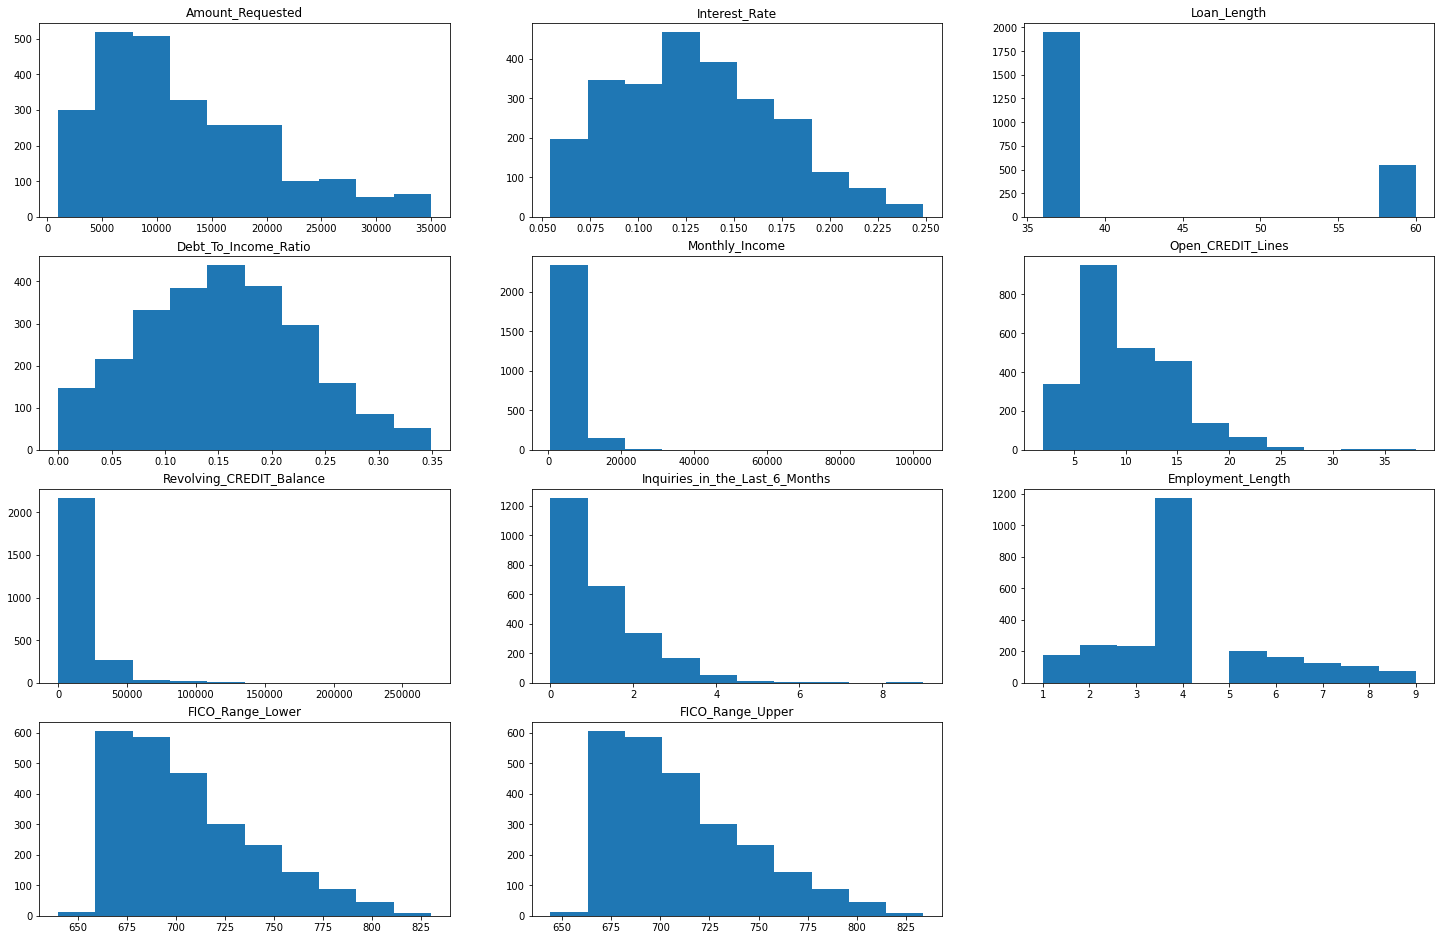

In [32]:
# As univariate analysis is done on the numeric data

plt.figure(figsize=(25,25))
for i , variable in enumerate(numeric_colums): 
  plt.subplot(6,3,i+1)
  plt.hist(df[variable])
  plt.title(variable)
plt.show()

In [33]:
# As seen we will now seperate continuous data columns.
continuous_data_columns = ['Amount_Requested','Debt_To_Income_Ratio','Monthly_Income'
                           ,'Revolving_CREDIT_Balance','FICO_Range_Lower',
                           'FICO_Range_Upper']

# Columns with cluttered data
cluttered_data_columns = ['Monthly_Income','Revolving_CREDIT_Balance']

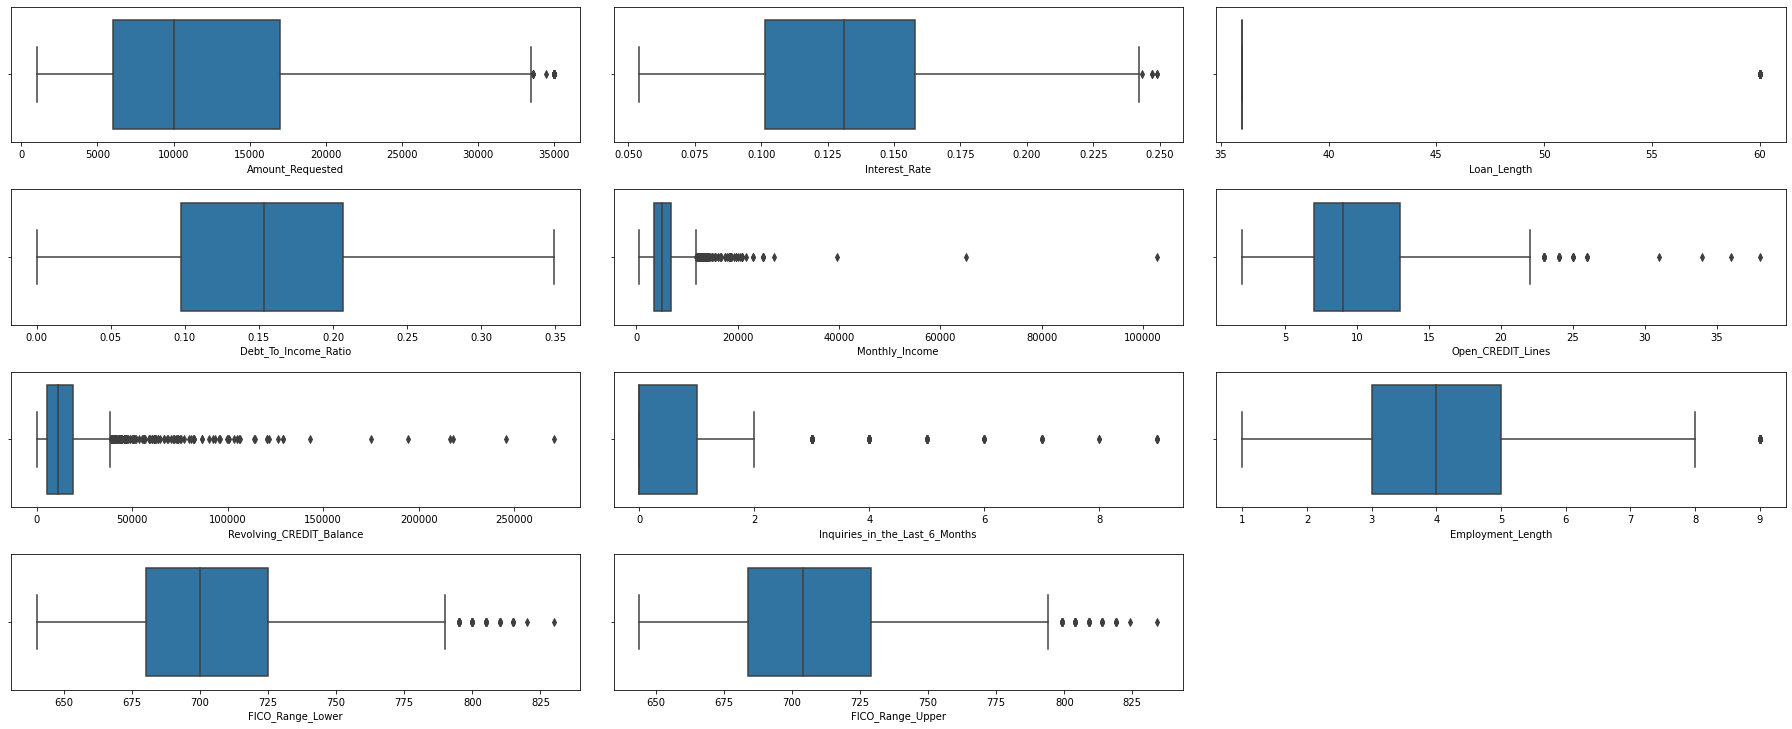

In [34]:
# Lets find the outliers in our dataset
plt.figure(figsize=(25,25))
for i, variable in enumerate(numeric_colums):  
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  sns.boxplot(df[variable])
plt.show()

In [35]:
# As seen from the boxplot, there are outiers in our data so we need to do outlier clipping 
# We are defining a function called 'outlers' which will do outliers clipping for us
# As we remove outliers of only independent variables and not target variable
def outliers(features):
  q1=df[features].quantile(0.25)
  q3=df[features].quantile(0.75)
  lower = q1 - 1.5*(q3-q1)
  upper = q3 + 1.5*(q3-q1)
  df[features] = np.clip(df[features],lower,upper)

In [36]:
for i in continuous_data_columns:
  outliers(i)

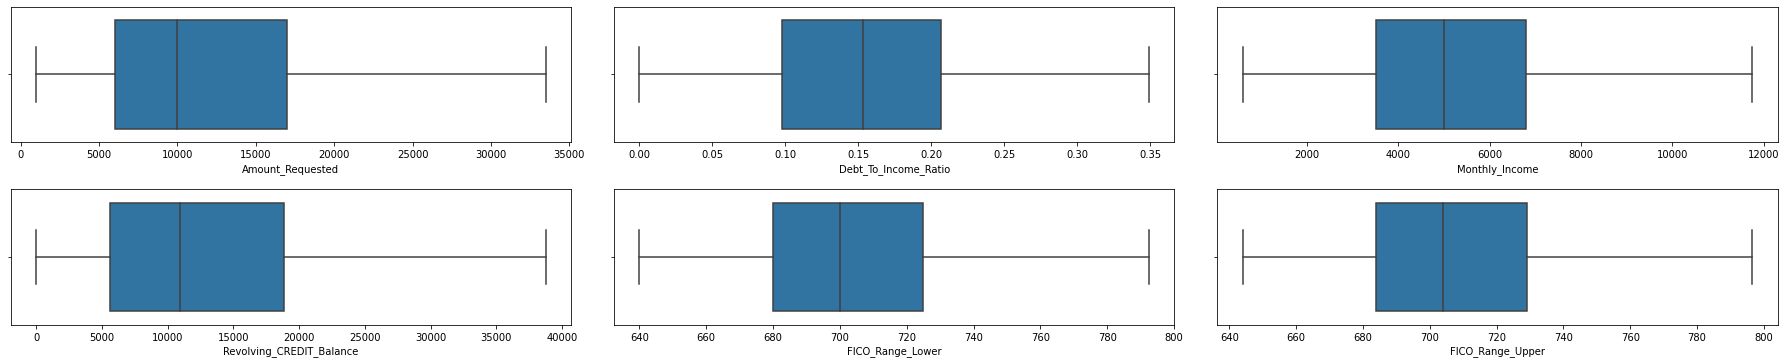

In [37]:
# Lets check for outliers
# Lets find the outliers in our dataset
plt.figure(figsize=(25,25))
for i, variable in enumerate(continuous_data_columns):  
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  sns.boxplot(df[variable])
plt.show()

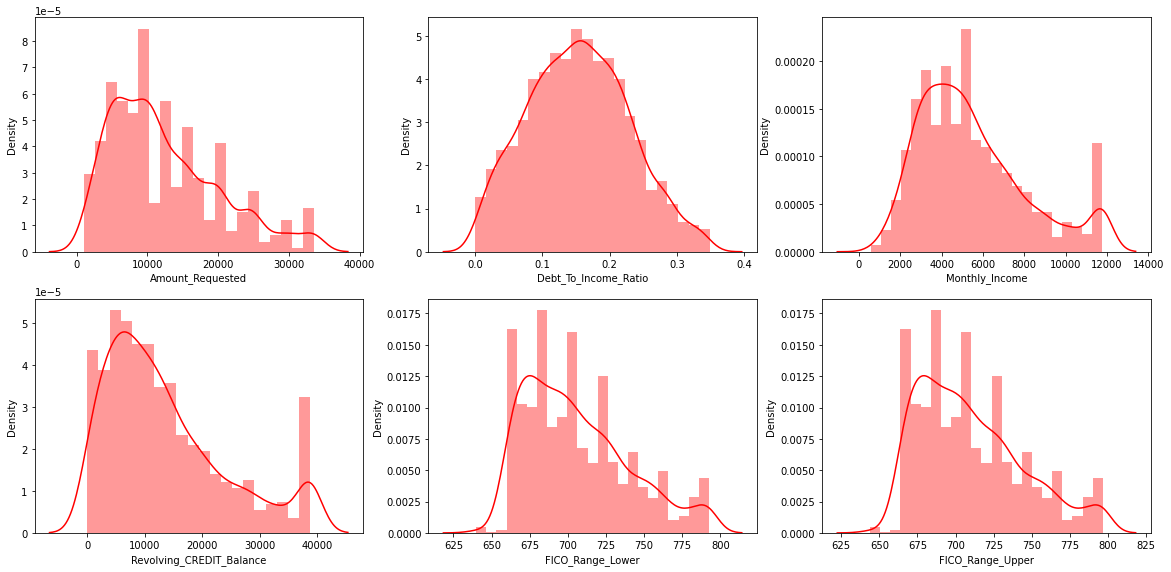

In [38]:
# Lets ee if our continuous_data_columns has a normal distribution or not
plt.figure(figsize=(20,25))
for i, variable in enumerate(continuous_data_columns):
  plt.subplot(5,3,i+1)
  sns.distplot(df[variable],color='red')
plt.show()

In [39]:
# fUNCTION TO CREATE BARPLOTS THAT INDICATE PERCENTAGE FOR EACH CATEGORY.
def perc_on_bar(plot,feature):
  """
  plot
  feature: categorical features
  the function won't work if a column is passd in hue parameter
  """
  total = len(feature) # length of the column
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total) # percentage of each class of the category
    x=p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
    y=p.get_y() + p.get_height()    # Height of the plot
    ax.annotate(percentage,(x,y),size = 12)  # annotate the percentage
plt.show()

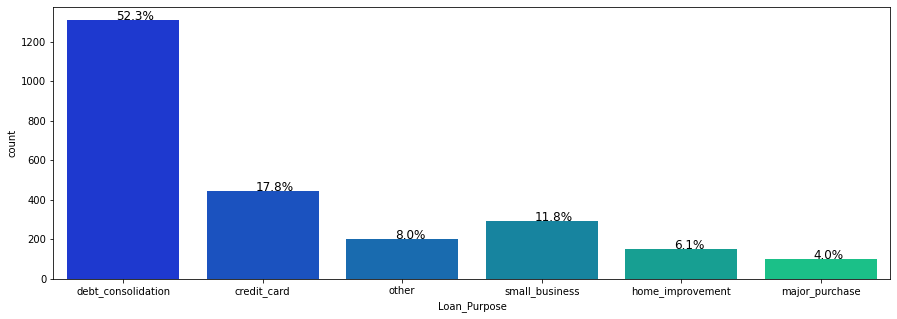

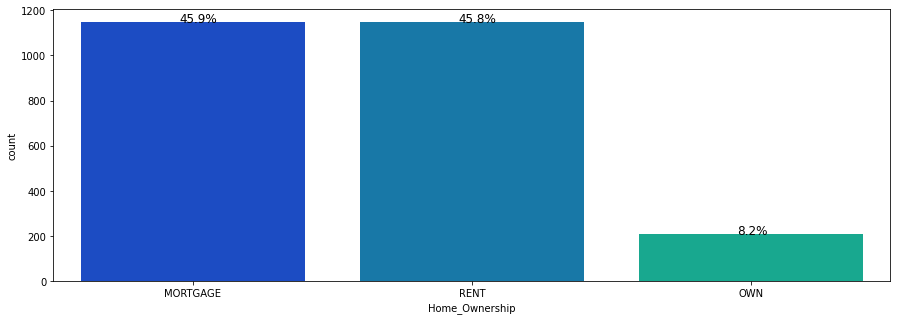

In [40]:
for i in categoric_columns:
  plt.figure(figsize = (15,5))
  ax = sns.countplot(df[i],palette='winter')
  perc_on_bar(ax,df[i])

## Observations: 
1. As seen from the graphs our data had outliers which we removed by clipping the outliers to lower and upper whisker respectively.
2. The Loan_Purpose for most of the people is debt_consolidation while major_purchase being the least.
3. The maximum people requesting for a loan has already MORTGAGE on thier Home.

# Bi-Variate Analysis


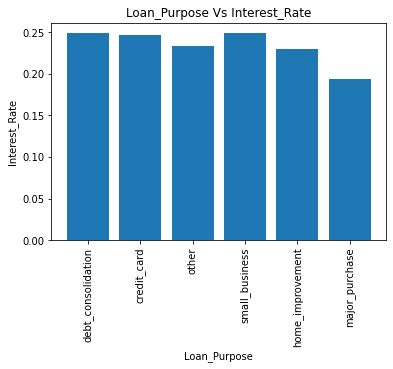

In [41]:
plt.bar(df['Loan_Purpose'], df['Interest_Rate'])
plt.title('Loan_Purpose Vs Interest_Rate')
plt.xlabel('Loan_Purpose')
plt.ylabel('Interest_Rate')
plt.xticks(rotation=90)
plt.show()
# The resulting graph shows that how the Interest_Rate varies for different Loan_Purposes

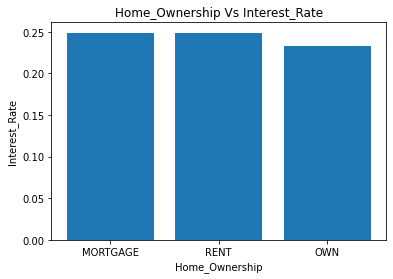

In [42]:
plt.bar(df['Home_Ownership'], df['Interest_Rate'])
plt.title('Home_Ownership Vs Interest_Rate')
plt.xlabel('Home_Ownership')
plt.ylabel('Interest_Rate')
plt.show()
# The resulting graph shows that how the Interest_Rate varies for different Home_Ownership

## Observation: 
1. The Interest_Rate is lowest for major_purchases while highest being for small_business which implies that there is more risk in giving loan for the purpose of small_business as it may fail resulting in not able to pay back the loan amount.
2. The Interest_Rate for the people with own home is less as compared to people who already has a MORTGAGE on the house or lives in rented house.

# Multi-Variate Analysis

No handles with labels found to put in legend.


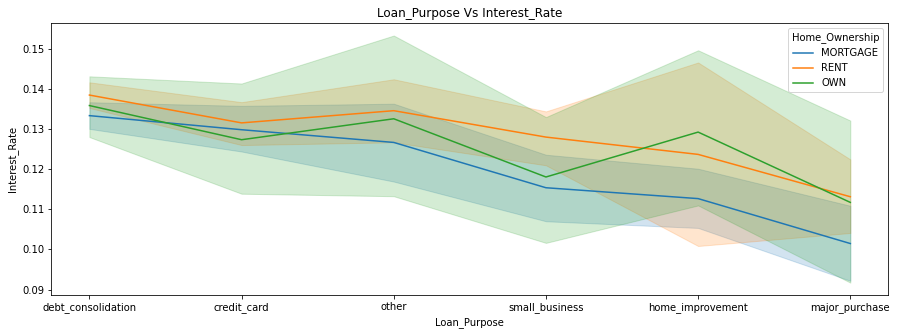

In [43]:
plt.figure(figsize=(15,5))
plt.title('Loan_Purpose Vs Interest_Rate')
plt.legend()
sns.lineplot(df['Loan_Purpose'], df['Interest_Rate'],df['Home_Ownership'])
plt.show()

## Observations: 
The graph shows how for various Loan_Purpose the Interest_Rate varies when people have various Home_Ownership

It implies that if a person has Mortgage on his house then for major_purchases he will get least interest rate.

# Modelling

In [44]:
X = df.drop(['Interest_Rate'],axis=1)
Y = df[['Interest_Rate']]
print(X)
print(Y)

      Amount_Requested  Loan_Length  ... FICO_Range_Lower  FICO_Range_Upper
0              20000.0         36.0  ...            735.0             739.0
1              19200.0         36.0  ...            715.0             719.0
2              33500.0         60.0  ...            690.0             694.0
3              10000.0         36.0  ...            695.0             699.0
4              12000.0         36.0  ...            695.0             699.0
...                ...          ...  ...              ...               ...
2495           30000.0         60.0  ...            705.0             709.0
2496           16000.0         60.0  ...            740.0             744.0
2497           10000.0         36.0  ...            680.0             684.0
2498            6000.0         36.0  ...            675.0             679.0
2499            9000.0         36.0  ...            670.0             674.0

[2500 rows x 12 columns]
      Interest_Rate
0            0.0890
1            0.1212
2 

In [45]:
# We are creating dummies for categorical data
X=pd.get_dummies(X,columns= categoric_columns,drop_first = True)

# Sklearn Model

In [46]:
# Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size = 0.3, random_state = 13)

In [47]:
# Fitting linear model

from sklearn.linear_model import LinearRegression 
linearregression = LinearRegression()
linearregression.fit(X_train, Y_train)

LinearRegression()

In [48]:
# Lets look at the Beta values in the equation of linear regression
print('Intercept of the linear equation: ', linearregression.intercept_)  # beta0
print('\nCoefficients of the equaion are: ',linearregression.coef_)       # beta1,beta2....beta n

Intercept of the linear equation:  [0.69143058]

Coefficients of the equaion are:  [[ 1.73075867e-06  1.35865219e-03 -1.78089791e-03 -6.92312510e-07
  -1.45123971e-04 -1.62372209e-07  3.17583509e-03  1.01992239e-04
  -4.48982375e-04 -4.48982375e-04  4.43309781e-04  8.20867728e-04
   5.14538007e-03  7.98762046e-03  3.47924750e-03  7.83087069e-04
   1.10801393e-03]]


In [49]:
pred_train = linearregression.predict(X_train)
pred_test = linearregression.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [51]:
# Lets look at our model Predictions
print('R2_Score on Train :',r2_score(Y_train, pred_train))
print('R2_Score on Test :',r2_score(Y_test, pred_test))
print('*'*20)
print('Mean Absolute Error on Train :',mean_absolute_error(Y_train,pred_train))
print('Mean Absolute Error on Test :',mean_absolute_error(Y_test,pred_test))
print('*'*20)
print('Mean Absolute Percentage Error on Train :',mean_absolute_percentage_error(Y_train,pred_train))
print('Mean Absolute Percentage Error on Test :',mean_absolute_percentage_error(Y_test,pred_test))

R2_Score on Train : 0.7710205989850899
R2_Score on Test : 0.7648282721155835
********************
Mean Absolute Error on Train : 0.015753242085823696
Mean Absolute Error on Test : 0.015263732284369946
********************
Mean Absolute Percentage Error on Train : 0.1339875746415324
Mean Absolute Percentage Error on Test : 0.13602274233756537


# Stats Model

In [52]:
import statsmodels.api as sm
# Let us buit linear regression model using statsmodel
# We add constant as there is no interept in statsmodel
X = sm.add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 51)

olsmod0 = sm.OLS(Y_train, X_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     363.6
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:57:17   Log-Likelihood:                 4365.6
No. Observations:                1750   AIC:                            -8697.
Df Residuals:                    1733   BIC:                            -8604.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [53]:
# Checking for multi-colinearity using VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index = X_train.columns)
vif_series2 = vif_series1.sort_values(ascending=False)
print(f'Series before feature selection: \n\n {vif_series2}')

Series before feature selection: 

 FICO_Range_Upper                        inf
FICO_Range_Lower                        inf
Loan_Purpose_debt_consolidation    1.875030
Amount_Requested                   1.744459
Monthly_Income                     1.723716
Revolving_CREDIT_Balance           1.606386
Loan_Purpose_small_business        1.570137
Debt_To_Income_Ratio               1.465589
Loan_Purpose_other                 1.357418
Loan_Purpose_home_improvement      1.357064
Open_CREDIT_Lines                  1.356426
Home_Ownership_RENT                1.295383
Loan_Purpose_major_purchase        1.279910
Loan_Length                        1.260345
Home_Ownership_OWN                 1.123981
Inquiries_in_the_Last_6_Months     1.054713
Employment_Length                  1.024260
const                              0.000000
dtype: float64


In [54]:
# Here we are defining a function to drop vif > 5 one by one.
def calculate_vif(X,thresh=5.0):

  variables = list(range(X.shape[1]))
  dropped = True
  while dropped:

    dropped = False
    vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
           for  ix in range(X.iloc[:, variables].shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:

      print('Dropping \''+ X.iloc[:,variables].columns[maxloc]+
            '\' at index: ' + str(maxloc))
      
      del variables[maxloc]
      dropped =True

 
  print(X.columns[variables])
  return X.iloc[:,variables]

In [55]:
# Creating a new X_train with dropped VIF > 5
X_train1 = calculate_vif(X_train)

Dropping 'FICO_Range_Lower' at index: 9
Dropping 'const' at index: 0
Dropping 'FICO_Range_Upper' at index: 8
Dropping 'Loan_Length' at index: 1
Dropping 'Monthly_Income' at index: 2
Dropping 'Open_CREDIT_Lines' at index: 2
Dropping 'Debt_To_Income_Ratio' at index: 1
Index(['Amount_Requested', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_other',
       'Loan_Purpose_small_business', 'Home_Ownership_OWN',
       'Home_Ownership_RENT'],
      dtype='object')


In [56]:
# Lets check if the value of vif > 5 has been dropped or not
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index = X_train1.columns)
vif_series2 = vif_series1.sort_values(ascending=False)
print(f'Series before feature selection: \n\n {vif_series2}')

Series before feature selection: 

 Employment_Length                  4.390113
Amount_Requested                   4.120168
Loan_Purpose_debt_consolidation    3.075434
Revolving_CREDIT_Balance           3.018968
Home_Ownership_RENT                1.805305
Inquiries_in_the_Last_6_Months     1.530539
Loan_Purpose_small_business        1.417393
Loan_Purpose_other                 1.279607
Loan_Purpose_home_improvement      1.225564
Home_Ownership_OWN                 1.128680
Loan_Purpose_major_purchase        1.117812
dtype: float64


In [57]:
# This is a function to drop the p-value > 0.05
cols = X_train1.columns.tolist()
max_p_value = 1
while len(cols) > 0:
    # Defining the train set
    X_train1_aux = X_train1[cols]
    # fitting model
    model = sm.OLS(Y_train, X_train1_aux).fit()
    # Getting the p-value and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
            break
           
selected_features = cols
print(selected_features)

['Amount_Requested', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement', 'Loan_Purpose_major_purchase', 'Loan_Purpose_other', 'Loan_Purpose_small_business', 'Home_Ownership_OWN', 'Home_Ownership_RENT']


In [58]:
# Creating a new X_train with columns with p-value < 0.05
X_train2 = X_train1_aux

In [59]:
# Again fitting the new updated X_train in the stats-model
olsmod1 = sm.OLS(Y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Interest_Rate   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1445.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:57:18   Log-Likelihood:                          3022.5
No. Observations:                1750   AIC:                                     -6023.
Df Residuals:                    1739   BIC:                                     -5963.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [60]:
X_test_final = X_test[X_train1_aux.columns]     # We are filtering out the columns in train in which we filtered

In [69]:
pred_train_stats_model = olsres1.predict(X_train2)
pred_test_stats_model  = olsres1.predict(X_test_final)

In [73]:
# Lets look at our model Predictions

print('Mean Absolute Error on Train :',mean_absolute_error(Y_train,pred_train_stats_model))
print('Mean Absolute Error on Test :',mean_absolute_error(Y_test,pred_test_stats_model))
print('*'*20)
print('Mean Absolute Percentage Error on Train :',mean_absolute_percentage_error(Y_train,pred_train_stats_model))
print('Mean Absolute Percentage Error on Test :',mean_absolute_percentage_error(Y_test,pred_test_stats_model))

Mean Absolute Error on Train : 0.03452287061540414
Mean Absolute Error on Test : 0.03666489087271372
********************
Mean Absolute Percentage Error on Train : 0.29565202215868913
Mean Absolute Percentage Error on Test : 0.30715535294849


# Assumption Of Linear Regression

### 1. Linearity 

In [61]:
residual = olsres1.resid
np.mean(residual)


residual = olsres1.resid
fitted =olsres1.fittedvalues # predicted values

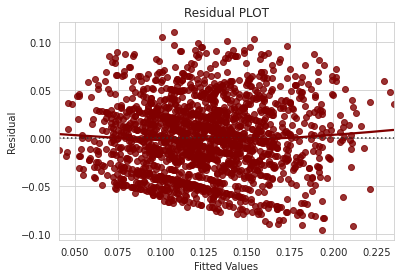

In [68]:
sns.set_style('whitegrid')
sns.residplot(fitted,residual,lowess=True,color='maroon')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual PLOT')
plt.show()

The graph shows that for my model the how my linear line is compared to the mean of the errors, the more the line matching to the model the better.

### Normality Of Errors

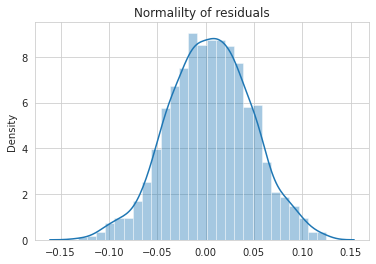

In [63]:
sns.distplot(residual)
plt.title('Normalilty of residuals')
plt.show()

The graph shows us the distribution of errors of my model which indicates that the the Errors are normaly distributed.

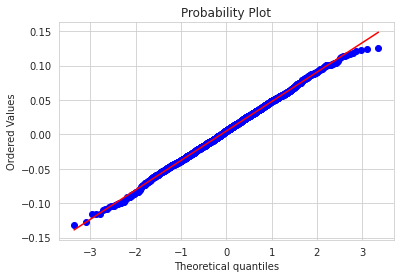

In [64]:
import pylab
import scipy.stats as stats
stats.probplot(residual, dist='norm',plot=pylab)
plt.show()

### TEST FOR HOMOSCEDASTIC

H0 = Residuals are homoscedastic

Ha = Residuals are hetroscedastic

In [65]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(residual,X_train1_aux)
lzip(name,test)
# Since p-value > 0.05 we say that the residuals are homoscedastic. This assumption is ttherefore valid in the data.

[('F statistic', 0.9463777543272881), ('p-value', 0.7909476427985443)]

# Conclusion: 

We are choosing the stats model as it is givng us better results as compared to sklearn model. The following graph shows me how much my model is Predicting as compared to the Actual Values.

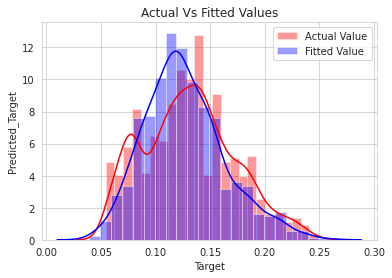

In [76]:
ax1 = sns.distplot(df['Interest_Rate'],color = 'red',label = 'Actual Value')
sns.distplot(pred_test_stats_model,color = 'blue',label = 'Fitted Value',ax=ax1)
plt.title('Actual Vs Fitted Values')
plt.xlabel('Target')
plt.ylabel('Predicted_Target')
plt.legend()
plt.show()